# CNN的學習範例

In [1]:
# coding: utf-8

## 載入Keras函式庫

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Conv2D
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


## 匯入用於提早結束學習的Callbacks Numpy函式庫

In [3]:
import keras.callbacks as callbacks
import numpy as np

## 匯入SVG函式庫

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

## 準備亂數作為測試資料

In [5]:
x_train = np.random.random((100, 6, 6, 1))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 6, 6, 1))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

## 製作卷積神經網路的模型
### kernel_initializer='lecun_uniform' 設定初始權重

In [7]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3, 3), input_shape=(6, 6, 1), kernel_initializer='lecun_uniform', name='Conv2D_1'))
model.add(Flatten(name='Flatten_1'))
model.add(Dense(units=10, activation='softmax', name='Dense_1'))

## SVG輸出序列

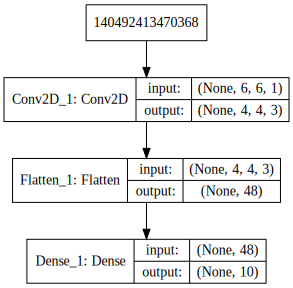

In [8]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## 提早結束學習設定

In [9]:
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

## 編譯模型

In [11]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[earlyStopping], validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s 1ms/step - loss: 0.0962 - val_loss: 0.0912
Epoch 2/10
80/80 [==============================] - 0s 51us/step - loss: 0.0962 - val_loss: 0.0912
Epoch 3/10
80/80 [==============================] - 0s 50us/step - loss: 0.0962 - val_loss: 0.0912
Epoch 4/10
80/80 [==============================] - 0s 61us/step - loss: 0.0961 - val_loss: 0.0912
Epoch 5/10
80/80 [==============================] - 0s 47us/step - loss: 0.0961 - val_loss: 0.0912
Epoch 6/10
80/80 [==============================] - 0s 39us/step - loss: 0.0961 - val_loss: 0.0912
Epoch 7/10
80/80 [==============================] - 0s 41us/step - loss: 0.0960 - val_loss: 0.0912
Epoch 8/10
80/80 [==============================] - 0s 42us/step - loss: 0.0960 - val_loss: 0.0912
Epoch 9/10
80/80 [==============================] - 0s 39us/step - loss: 0.0959 - val_loss: 0.0912
Epoch 10/10
80/80 [==============================] - 0s 41us/step 